In [52]:
#First Walkthrough
import networkx as nx
import tweepy
#from twitter_research_api.json import bearer_token
#conda install -c conda-forge tweepy
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
import pandas as pd



import json
import nltk
# conda install -c conda-forge nltk
from nltk.tokenize.toktok import ToktokTokenizer
import spacy # natural language processing library
# conda install -c conda-forge spacy
from datetime import datetime 
import tweepy
import re
import string
import unicodedata
from gensim import corpora
# conda install -c conda-forge gensim

### Sentiment analysis
from textblob import TextBlob
# conda install -c conda-forge textblob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# conda install -c conda-forge vaderSentiment

### Clean Tweets

In [53]:
def clean_tweet(tweet): 
    processed_tweet = tweet
    processed_tweet["id"] = tweet['id']
    processed_tweet["user"] = tweet['author_id']
    created_at = datetime.strptime(tweet["created_at"],"%Y-%m-%dT%H:%M:%S.%fZ")
    processed_tweet["created_at"] = created_at
    processed_tweet["lang"] = tweet['lang']
    
    if tweet['lang'] != "en":
        processed_tweet["is_en"] = False
    else: 
        processed_tweet["is_en"] = True
            
    return processed_tweet

In [54]:
tweet_data_list = json.loads(open('super_olympics.json').read())
len(tweet_data_list)

922

In [55]:
filtered_data = []
for tdl_item in tweet_data_list: 
    for tw_group in tdl_item:
        filtered_tweet = clean_tweet(tw_group)
        filtered_data.append(filtered_tweet)
        
#print first 5
filtered_data[0:5]

TypeError: string indices must be integers

In [18]:
# Re-serialize dates and save raw data
clean_official_super_bowl_tweets_scrape3_json = []
for fd in filtered_data:
    fd['created_at'] = datetime.strftime(fd['created_at'],"%Y-%m-%dT%H:%M:%S.%fZ")
    clean_official_super_bowl_tweets_scrape3_json.append(fd)
with open("clean_official_super_bowl_tweets_scrape3.json", "w") as outfile:
    json.dump(clean_official_super_bowl_tweets_scrape3s_json, outfile, indent=4)

### Process Tweets

In [ ]:
filtered_data = json.loads(open('clean_super_bowl_olympics.json').read())

In [ ]:
# create a list of all the tweet text 
# we filter out all tweets that are not English
tweet_text = []
for tweet in filtered_data:
    if tweet["is_en"]:
        if tweet.get("is_rt"): 
            tweet_text.append(tweet["rt_text"].replace("\n", " "))
        else:
            tweet_text.append(tweet["text"].replace("\n", " "))

In [ ]:
# Length of english tweets - see how many were dropped
len(tweet_text)

### Preprocessing Data

In [ ]:
# remove HTML links, mentions, hashtags, and special characters

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ' ')    
    return text

def strip_mentions(text):
    entity_prefixes = ['@']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def strip_hashtags(text):
    entity_prefixes = ['#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
        
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
stripped_tweet_text = []
for elem in tweet_text:
    elem = strip_links(elem)
    elem = strip_mentions(elem)
    elem = strip_hashtags(elem)
    elem = elem.replace('RT', '')
    elem = remove_special_characters(elem)
    stripped_tweet_text.append(elem)

In [ ]:
#Checking first original tweet:
tweet_text[0]

In [ ]:
#Checking first tweet to see if it was cleaned:
stripped_tweet_text[0]

In [ ]:
#Checking second original tweet:
tweet_text[1]

In [ ]:
#Checking second tweet to see if it was cleaned:
stripped_tweet_text[1]

In [ ]:
#Creating a dataframe from the filtered data (when the non english tweets were dropped) and when it was cleaned:
data = {'original_tweet_text': tweet_text,
        'clean_tweet_text' : stripped_tweet_text}

df2 = pd.DataFrame(data)

#df2

In [ ]:
df2.to_csv('filtered_super_bowl_olympics_tweets.csv')

### Sentiment Analysis

In [ ]:
df2 = pd.read_csv('filtered_super_bowl_olympics_tweets.csv')

In [4]:
#Subjectivity - tells how subjective or opiniative the text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity - tells how positive otr negative the text is
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['clean_tweet_text'].apply(getSubjectivity)
df['polarity'] = df['clean_tweet_text'].apply(getPolarity)

NameError: name 'TextBlob' is not defined

In [71]:
#Creating function to classify or label the sentiments as neg, pos, neu.
def getSentiment(value):
    if value <0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(getSentiment)

In [ ]:
df

In [29]:
#df.to_csv('sentiment_analysis_la28_tweets.csv')

### Getting Stats

In [72]:
###Loading CSV if you want to start at this step
df = pd.read_csv('official_subjectivity_polarity_scores_super_olympics_tweets.csv')

#df3 = pd.read_csv('super_bowl_olympics.csv')

In [75]:
def getSentiment(value):
    if value <0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(getSentiment)

In [89]:
df.to_csv('sentiment_analysis_super_olympics_tweets.csv')



In [77]:
# #Counting how many of each sentiment
sentiment_count = {}

#Converting time stamp data into strings to iterate
#Need to assign it to a variable in order to iterate
sentiment = df['sentiment'].astype(str)


#for column in df['month_year']:
for type in sentiment:
    #for time in column:
    if type in sentiment_count:
        sentiment_count[type] += 1
    else: 
        sentiment_count[type] = 1
        
sentiment_count

{'Positive': 559, 'Negative': 269, 'Neutral': 94}

In [78]:
#Gettting Percentage:

ptweets_p = df[sentiment == 'Positive']
ptweets_p = ptweets_p['clean_tweet_text']

#print ("Positive tweets:", round((ptweets.shape[0] / df3.shape[0]) *100 , 1))

ptweets_n = df[sentiment == 'Negative']
ptweets_n = ptweets_n['clean_tweet_text']

ptweets_neu = df[sentiment == 'Neutral']
ptweets_neu = ptweets_neu['clean_tweet_text']

print ("Positive tweets:", round((ptweets_p.shape[0] / df.shape[0]) *100 , 1),'%')
print ("Negative tweets:", round((ptweets_n.shape[0] / df.shape[0]) *100 , 1),'%')
print ("Neutral tweets:", round((ptweets_neu.shape[0] / df.shape[0]) *100 , 1),'%')

Positive tweets: 60.6 %
Negative tweets: 29.2 %
Neutral tweets: 10.2 %


### Cleaning up Sentiment Analysis + Deviding up by Sentiment

In [79]:
#Creating df's with just one sentiment
df2 = df[df.sentiment == 'Positive']
df3 = df[df.sentiment == 'Negative']
df4 = df[df.sentiment == 'Neutral']

In [80]:
# #Run each data frame at a time to double check that the rows dropped correctly
#df2
#df3
#df4

# # Saving each to a CSV
df2.to_csv('unclean_positive_sentiment_analysis_super_olympics_tweets.csv')
df3.to_csv('unclean_negative_sentiment_analysis_super_olympics_tweets.csv')
df4.to_csv('unclean_neutral_sentiment_analysis_super_olympics_tweets.csv')

In [28]:
df2

,Unnamed: 0,original_tweet_text,clean_tweet_text,subjectivity,polarity,sentiment
0,0,#TBT to #SuperBowlLVI when we had the honor of...,TBT to SuperBowlLVI when we had the honor of s...,0.666667,0.3333333333333333,Positive
1,1,#TBT to #SuperBowlLVI when we had the honor of...,TBT to SuperBowlLVI when we had the honor of s...,0.666667,0.3333333333333333,Positive
4,4,#TBT to #SuperBowlLVI when we had the honor of...,TBT to SuperBowlLVI when we had the honor of s...,0.666667,0.3333333333333333,Positive
5,5,The 2022 Super Bowl brought a capacity crowd o...,The 2022 Super Bowl brought a capacity crowd o...,0.541667,0.008333333333333304,Positive
6,6,Princess was left at a police station with a n...,Princess was left at a police station with a n...,0.300000,0.025000000000000005,Positive
...,...,...,...,...,...,...
274518,274012,Big shoutout to @KatStryker111 for always putt...,Big shoutout to for always putting in so much ...,0.491667,0.133333,Positive
274519,274013,Big shoutout to @KatStryker111 for always putt...,Big shoutout to for always putting in so much ...,0.491667,0.133333,Positive
274520,274014,"Playoff push hype joint time, #BillsMafia - en...",Playoff push hype joint time BillsMafia enjoy ...,0.525000,0.375,Positive
274521,274015,"Playoff push hype joint time, #BillsMafia - en...",Playoff push hype joint time BillsMafia enjoy ...,0.525000,0.375,Positive


In [81]:
# if you get an error running script because of string and float values
df2['polarity'] = df2['polarity'].astype(float)
df3['polarity'] = df3['polarity'].astype(float)
df4['polarity'] = df4['polarity'].astype(float)
# Sorting CSVs by Polarity

#Positive - will be sorted by decreasing order
df2_sorted = df2.sort_values(['polarity'], ascending=False)

#Negative - will be increasing in order because we want to start by most negative
df3_sorted = df3.sort_values(['polarity'], ascending=True)

#Neutral - can't really be sorted?
df4_sorted = df4.sort_values(['polarity'], ascending=True)



<ipython-input-81-2c98301aa3c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['polarity'] = df2['polarity'].astype(float)
<ipython-input-81-2c98301aa3c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['polarity'] = df3['polarity'].astype(float)
<ipython-input-81-2c98301aa3c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [82]:
#Dropping Duplicates from each CSV
df2_duplicates_dropped = df2_sorted.drop_duplicates(subset='clean_tweet_text', keep = 'first')
df3_duplicates_dropped = df3_sorted.drop_duplicates(subset='clean_tweet_text', keep = 'first')
df4_duplicates_dropped = df4_sorted.drop_duplicates(subset='clean_tweet_text', keep = 'first')

In [83]:
#Writing clean df's to csv
#Note: 'clean' means dropped RTs and ordered by polarity 
df2_duplicates_dropped.to_csv('clean_positive_sentiment_analysis_super_olympics_tweets.csv')
df3_duplicates_dropped.to_csv('clean_negative_sentiment_analysis_super_olympics_tweets.csv')
df4_duplicates_dropped.to_csv('clean_neutral_sentiment_analysis_super_olympics_tweets.csv')

In [87]:
df3

,Unnamed: 0.1,Unnamed: 0,original_tweet_text,clean_tweet_text,subjectivity,polarity,sentiment
5,5,5,“If you’re partnering with the displacement ma...,If youre partnering with the displacement mach...,0.687500,-0.312500,Negative
7,7,7,We examined both the social and financial cost...,We examined both the social and financial cost...,0.240278,-0.011111,Negative
8,8,8,We examined both the social and financial cost...,We examined both the social and financial cost...,0.240278,-0.011111,Negative
15,15,15,We examined both the social and financial cost...,We examined both the social and financial cost...,0.240278,-0.011111,Negative
16,16,16,We examined both the social and financial cost...,We examined both the social and financial cost...,0.240278,-0.011111,Negative
...,...,...,...,...,...,...,...
909,909,909,"#SuperBowlLVI is a mini #LA28, down to the peo...",SuperBowlLVI is a mini LA28 down to the people...,0.288889,-0.155556,Negative
910,910,910,"#SuperBowlLVI is a mini #LA28, down to the peo...",SuperBowlLVI is a mini LA28 down to the people...,0.288889,-0.155556,Negative
911,911,911,"#SuperBowlLVI is a mini #LA28, down to the peo...",SuperBowlLVI is a mini LA28 down to the people...,0.288889,-0.155556,Negative
912,912,912,"#SuperBowlLVI is a mini #LA28, down to the peo...",SuperBowlLVI is a mini LA28 down to the people...,0.288889,-0.155556,Negative


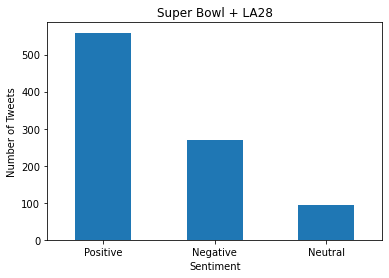

In [90]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Super Bowl + LA28')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show

plt.savefig("super_olympics_tweets_bar_plot.png")

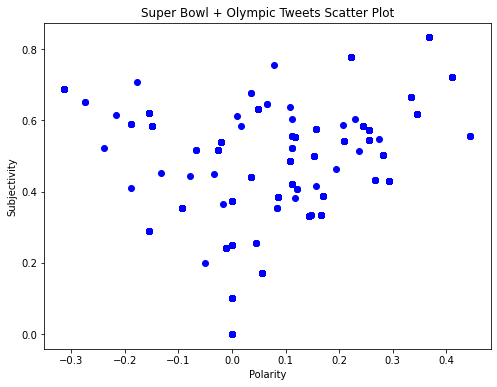

In [93]:
#Create a scatter plot of the subjectivity and polarity
plt.figure(figsize = (8,6))
#for i in range(0, len(df3)):
for i in range(0, df.shape[0]):
    #plotting the polarity from position i and subjectivity from position i
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'blue')
plt.title('Super Bowl + Olympic Tweets Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

plt.savefig("sb_olympics_tweets_scatter_plot.png")